# Ejemplos usando de árboles de decisión

En este cuaderno vamos a explorar los árbole de decisión utilizando scikit-learn. En esta ocación no vamos a preocuparnos por hacer la división entre datos de prueba y entrenamiento, simplemente vamos a ver cómo se comporta el método en distintos escenarios.

Usando la clase [sklearn.tree.DecisionTreeClassfier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), los hiperparámetros mencionados en las diapositivas se definen como:

```
criterion
max_depth
min_samples_split
min_samples_leaf
min_impurity_decrease
```

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_classification, make_moons
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
plt.rc('font', family='serif')
%matplotlib inline

In [5]:
def plot_decision_regions(X, y, classifier=None, resolution=0.02):
    """ Taken from Rashka's book """
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
    x2_min, x2_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    
    if classifier is not None:
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=cl,
            edgecolor='black'
        )

## Datos linealmente separables sin ruido


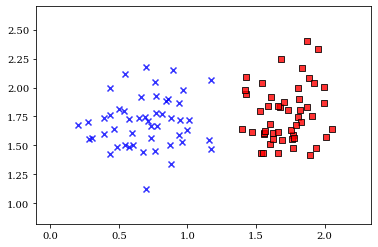

In [6]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1,
                           scale=0.5, shift=2)

rng = np.random.RandomState(42)
X += 0.5 * rng.uniform(size=X.shape)
plot_decision_regions(X, y)

In [7]:
tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier()

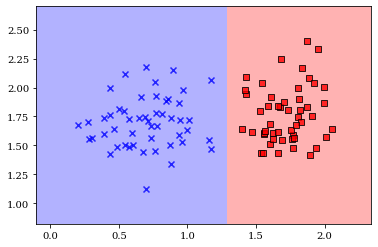

In [8]:
plot_decision_regions(X, y, classifier=tree)

## Datos linealmente separables con ruido

En este caso puedes intentar distintos valores de `max_depth`, para darte cuenta de cómo este valor puede producir *overfitting*

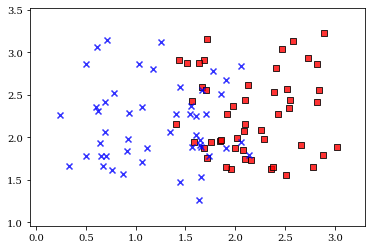

In [9]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1,
                           scale=0.5, shift=2)

rng = np.random.RandomState(42)
X += 1.5 * rng.uniform(size=X.shape)
plot_decision_regions(X, y)

DecisionTreeClassifier(max_depth=2)

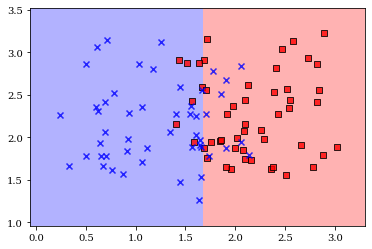

In [10]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X, y)
plot_decision_regions(X, y, classifier=tree)

DecisionTreeClassifier(max_depth=10)

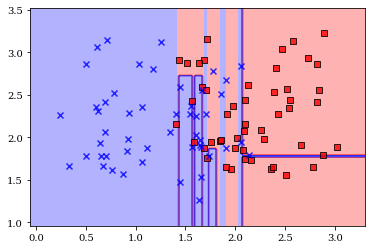

In [12]:
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X, y)
plot_decision_regions(X, y, classifier=tree)

## Caso no lineal

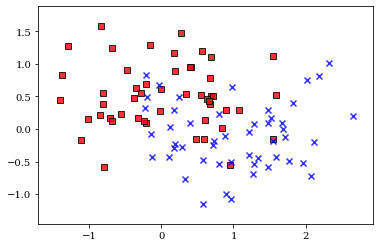

In [31]:
X, y = make_moons(noise=0.4,)
plot_decision_regions(X, y)

primero, observemos lo que un clasificador lineal puede hacer con un data set como este.

DecisionTreeClassifier(max_depth=1)

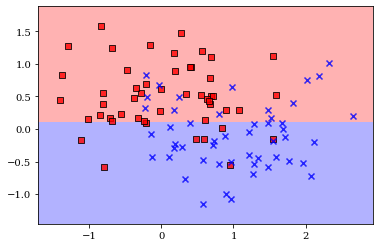

In [32]:
tree = DecisionTreeClassifier(max_depth=1)
tree.fit(X, y)
plot_decision_regions(X, y, classifier=tree)

DecisionTreeClassifier(max_depth=2)

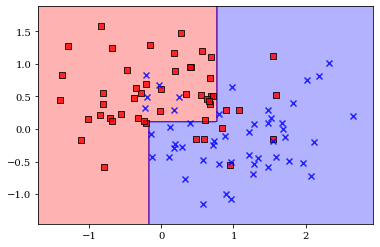

In [33]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X, y)
plot_decision_regions(X, y, classifier=tree)

DecisionTreeClassifier(max_depth=4)

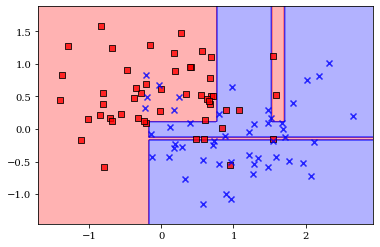

In [42]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X, y)
plot_decision_regions(X, y, classifier=tree)

## Encontrar mejores hiperparametros

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [63]:
depths = [1,2,3,4,5,6,7,8,9,10]

In [64]:
error_prueba=[]
error_entrenamiento=[]
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train, y_train)
    
    print(f'Error de prueba depth {depth} es igual a {accuracy_score(y_train,tree.predict(X_train))}')
    print(f'Error de prueba depth {depth} es igual a {accuracy_score(y_test,tree.predict(X_test))}')
    
    error_entrenamiento.append(accuracy_score(y_train,tree.predict(X_train)))
    error_prueba.append(accuracy_score(y_test,tree.predict(X_test)))
    

DecisionTreeClassifier(max_depth=1)

Error de prueba depth 1 es igual a 0.6333333333333333
Error de prueba depth 1 es igual a 0.6


DecisionTreeClassifier(max_depth=2)

Error de prueba depth 2 es igual a 0.775
Error de prueba depth 2 es igual a 0.7666666666666667


DecisionTreeClassifier(max_depth=3)

Error de prueba depth 3 es igual a 0.8166666666666667
Error de prueba depth 3 es igual a 0.7666666666666667


DecisionTreeClassifier(max_depth=4)

Error de prueba depth 4 es igual a 0.8333333333333334
Error de prueba depth 4 es igual a 0.7666666666666667


DecisionTreeClassifier(max_depth=5)

Error de prueba depth 5 es igual a 0.8583333333333333
Error de prueba depth 5 es igual a 0.7333333333333333


DecisionTreeClassifier(max_depth=6)

Error de prueba depth 6 es igual a 0.875
Error de prueba depth 6 es igual a 0.7333333333333333


DecisionTreeClassifier(max_depth=7)

Error de prueba depth 7 es igual a 0.9
Error de prueba depth 7 es igual a 0.6666666666666666


DecisionTreeClassifier(max_depth=8)

Error de prueba depth 8 es igual a 0.9416666666666667
Error de prueba depth 8 es igual a 0.6333333333333333


DecisionTreeClassifier(max_depth=9)

Error de prueba depth 9 es igual a 0.95
Error de prueba depth 9 es igual a 0.6333333333333333


DecisionTreeClassifier(max_depth=10)

Error de prueba depth 10 es igual a 0.9583333333333334
Error de prueba depth 10 es igual a 0.6333333333333333


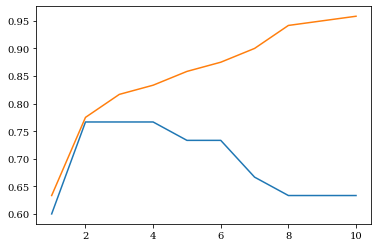

In [65]:
plt.plot(depths,error_prueba)
plt.plot(depths,error_entrenamiento)

## Ejemplo multiclase

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Sepal length')

Text(0, 0.5, 'Sepal width')

(3.8, 8.4)

(1.5, 4.9)

([], [])

([], [])

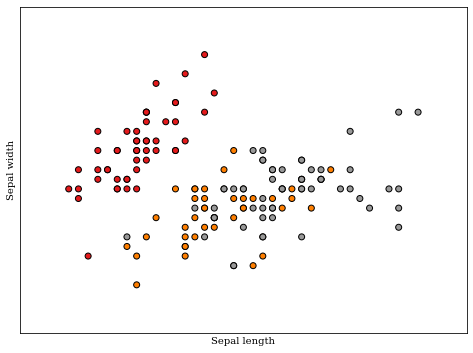

In [66]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
depths = [1,2,3,4,5,6,7,8,9,10]

array([0, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 2, 2, 0,
       2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 1, 2, 0, 0,
       0, 1, 0, 1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 0, 2, 1,
       2, 0, 0, 0, 2, 1, 1, 2, 2, 2])

In [56]:
error_prueba=[]
error_entrenamiento=[]
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train, y_train)
    
    print(f'Error de prueba depth {depth} es igual a {accuracy_score(y_train,tree.predict(X_train))}')
    print(f'Error de prueba depth {depth} es igual a {accuracy_score(y_test,tree.predict(X_test))}')
    
    error_entrenamiento.append(accuracy_score(y_train,tree.predict(X_train)))
    error_prueba.append(accuracy_score(y_test,tree.predict(X_test)))

DecisionTreeClassifier(max_depth=1)

Error de prueba depth 1 es igual a 0.6666666666666666
Error de prueba depth 1 es igual a 0.4666666666666667


DecisionTreeClassifier(max_depth=2)

Error de prueba depth 2 es igual a 0.7833333333333333
Error de prueba depth 2 es igual a 0.7333333333333333


DecisionTreeClassifier(max_depth=3)

Error de prueba depth 3 es igual a 0.8166666666666667
Error de prueba depth 3 es igual a 0.7666666666666667


DecisionTreeClassifier(max_depth=4)

Error de prueba depth 4 es igual a 0.8333333333333334
Error de prueba depth 4 es igual a 0.7666666666666667


DecisionTreeClassifier(max_depth=5)

Error de prueba depth 5 es igual a 0.85
Error de prueba depth 5 es igual a 0.7


DecisionTreeClassifier(max_depth=6)

Error de prueba depth 6 es igual a 0.875
Error de prueba depth 6 es igual a 0.7333333333333333


DecisionTreeClassifier(max_depth=7)

Error de prueba depth 7 es igual a 0.8916666666666667
Error de prueba depth 7 es igual a 0.7


DecisionTreeClassifier(max_depth=8)

Error de prueba depth 8 es igual a 0.9083333333333333
Error de prueba depth 8 es igual a 0.7333333333333333


DecisionTreeClassifier(max_depth=9)

Error de prueba depth 9 es igual a 0.9083333333333333
Error de prueba depth 9 es igual a 0.7333333333333333


DecisionTreeClassifier(max_depth=10)

Error de prueba depth 10 es igual a 0.9416666666666667
Error de prueba depth 10 es igual a 0.7333333333333333


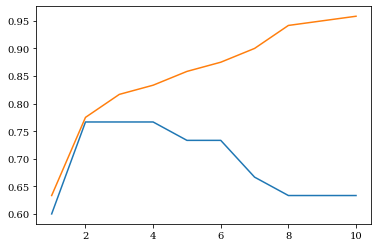

In [67]:
plt.plot(depths,error_prueba)
plt.plot(depths,error_entrenamiento)

DecisionTreeClassifier(max_depth=3)

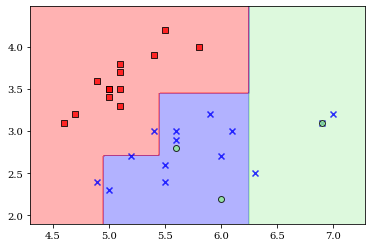

In [60]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
plot_decision_regions(X_test, y_test, classifier=tree)